In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import corner
import math
import csv
from numpy import *

import matplotlib
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import sklearn.metrics as metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from fpdf import FPDF
from PIL import Image
import pydotplus

%matplotlib inline
import graphviz
from sklearn import tree
from xgboost import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [74]:
planets = pd.read_csv('1-3mm & np.csv', skipinitialspace=True)

print(planets.columns)

Index(['run', 'planet', 'cv e', 'cv a', 'cv pericenter', 'cv i', 'initial e',
       'final e', 'mean e', 'min e',
       ...
       'max log mratio npi', 'sd log mratio npi', 'initial log mratio npo',
       'final log mratio npo', 'mean log mratio npo', 'min log mratio npo',
       'max log mratio npo', 'sd log mratio npo', 'end time', 'fate'],
      dtype='object', length=122)


In [75]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

## refining features

In [6]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=1)

ru = features_test['run'].to_numpy()
p = features_test['planet'].to_numpy()
e = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

d = ['run', 'planet', 'fate', 'end time']
 
ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

f = planets.columns.drop(d)

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
classifier = GradientBoostingClassifier(random_state=1)

In [8]:
n_features_to_select = 1
rfe = RFE(classifier, n_features_to_select)
rfe.fit(features_train, classes_train)

from operator import itemgetter
for x, y in (sorted(zip(rfe.ranking_ , f), key=itemgetter(0))):
    print(x, y)

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


1 initial log mratio mm3
2 mean log mratio mm1
3 sd e
4 min log mratio mm2
5 cv pericenter
6 initial log mratio mm1
7 max e
8 sd mhr mm2
9 final log mratio mm3
10 min log aratio npo
11 initial mhr npi
12 sd pericenter
13 min log mratio mm1
14 cv i
15 final mhr mm2
16 mean e
17 max log mratio mm3
18 max mhr mm2
19 min log mratio npo
20 min log aratio mm2
21 sd i
22 mean log mratio mm2
23 sd log aratio npo
24 sd mhr mm3
25 mean log aratio npo
26 final pericenter
27 max mhr mm1
28 mean log mratio npi
29 initial mhr mm3
30 final log aratio mm3
31 max jacobi
32 mean log aratio mm2
33 max mhr npo
34 max log mratio mm1
35 min mhr npo
36 max mhr npi
37 sd mhr mm1
38 cv e
39 final log mratio mm1
40 sd mhr npi
41 mean mhr mm2
42 max log aratio npo
43 final e
44 min mhr mm2
45 sd jacobi
46 max mhr mm3
47 initial log aratio npi
48 mean log aratio mm3
49 final i
50 initial log mratio mm2
51 min i
52 final log mratio npo
53 max pericenter
54 mean log mratio mm3
55 sd log aratio mm3
56 final log arat

In [9]:
rfc = GradientBoostingClassifier(random_state=1)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(features_train, classes_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=GradientBoostingClassifier(random_state=1), scoring='accuracy')

Optimal number of features: 34


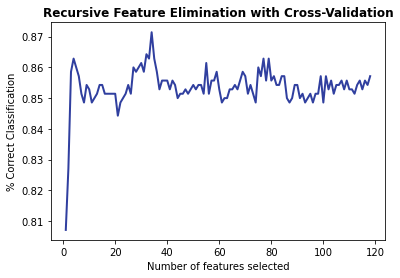

In [12]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

plt.figure()
plt.title('Recursive Feature Elimination with Cross-Validation', fontweight='bold')
plt.xlabel('Number of features selected')
plt.ylabel('% Correct Classification')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=2)

# plt.xlim(0,10)
plt.show()


## model

In [ ]:
# g = ['initial log mratio mm3', 'initial log mratio mm1', 'sd e', 'initial log mratio mm2', 'cv pericenter', 'max e', 
#      'sd mhr mm2', 'min log aratio npo', 'initial mhr npi', 'sd pericenter', 'cv i', 'final mhr mm2', 'mean e',
#      'max mhr mm2', 'initial log mratio npo', 'min log aratio mm2', 'sd i', 'sd log aratio npo', 'sd mhr mm3',
#      'mean log aratio npo', 'final pericenter', 'max mhr mm1', 'initial log mratio npi', 'initial mhr mm3', 
#      'final log aratio mm3','max jacobi', 'mean log aratio mm2', 'max mhr npo', 'min mhr npo', "max mhr npi",
#      "sd mhr mm1", "cv e", "sd mhr npi", "mean mhr mm2"]

# drops = []

# for i in range(len(planets.columns)):
#     if (planets.columns[i] in g):
#         pass
#     else:
#         drops.append(planets.columns[i])
        
# print(drops)



g = ['initial log mratio mm3', 'initial log mratio mm1', 'sd e', 'initial log mratio mm2']

drops = []

for i in range(len(planets.columns)):
    if (planets.columns[i] in g):
        pass
    else:
        drops.append(planets.columns[i])
        
print(drops)

In [76]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

In [77]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=183)

ru = features_test['run'].to_numpy()
p = features_test['planet'].to_numpy()
et = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

ru2 = features_train['run'].to_numpy()
p2 = features_train['planet'].to_numpy()
et2 = features_train['end time'].to_numpy()
fa2 = features_train['fate'].to_numpy()


d = ['run', 'planet', 'cv a', 'initial e', 'final e', 'min e', 'initial i', 'final i', 'mean i', 'min i', 
     'max i', 'initial pericenter', 'mean pericenter', 'min pericenter', 'max pericenter', 'initial jacobi',
     'final jacobi', 'mean jacobi', 'min jacobi', 'sd jacobi', 'initial mhr mm1', 'final mhr mm1', 
     'mean mhr mm1', 'min mhr mm1', 'initial mhr mm2', 'min mhr mm2', 'final mhr mm3', 'mean mhr mm3', 
     'min mhr mm3', 'max mhr mm3', 'initial log aratio mm1', 'final log aratio mm1', 'mean log aratio mm1', 
     'min log aratio mm1', 'max log aratio mm1', 'sd log aratio mm1', 'initial log aratio mm2', 
     'final log aratio mm2', 'max log aratio mm2', 'sd log aratio mm2', 'initial log aratio mm3', 
     'mean log aratio mm3', 'min log aratio mm3', 'max log aratio mm3', 'sd log aratio mm3', 
     'final log mratio mm1', 'mean log mratio mm1', 'min log mratio mm1', 'max log mratio mm1', 
     'sd log mratio mm1', 'final log mratio mm2', 'mean log mratio mm2', 'min log mratio mm2', 
     'max log mratio mm2', 'sd log mratio mm2', 'final log mratio mm3', 'mean log mratio mm3', 
     'min log mratio mm3', 'max log mratio mm3', 'sd log mratio mm3', 'final mhr npi', 'mean mhr npi', 
     'min mhr npi', 'initial mhr npo', 'final mhr npo', 'mean mhr npo', 'sd mhr npo', 
     'initial log aratio npi', 'final log aratio npi', 'mean log aratio npi', 'min log aratio npi', 
     'max log aratio npi', 'sd log aratio npi', 'initial log aratio npo', 'final log aratio npo', 
     'max log aratio npo', 'final log mratio npi', 'mean log mratio npi', 'min log mratio npi', 
     'max log mratio npi', 'sd log mratio npi', 'final log mratio npo', 'mean log mratio npo', 
     'min log mratio npo', 'max log mratio npo', 'sd log mratio npo', 'end time', 'fate']
            
        
ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## basic classifier metrics

In [78]:
classifier = GradientBoostingClassifier(learning_rate = 0.07, max_depth = 5, max_features = 'sqrt', n_estimators = 150, random_state = 183) # ne = 120-160ish

classifier.fit(features_train, classes_train)

score = classifier.decision_function(features_test)
classes_predict = classifier.predict(features_test)
print('classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

classifier is  90.33333333333333 % accurate on testing set


In [79]:
feats = classifier.feature_importances_
inds = np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

initial log mratio mm1 0.12376098512682254
initial log mratio mm2 0.10942707615068285
sd e 0.0775558946644497
initial log mratio npo 0.07624546302685598
initial log mratio mm3 0.06985541354315758
initial log mratio npi 0.05133469122113459
cv e 0.049226911580100445
max e 0.02754433892789369
sd i 0.026894057227974867
cv i 0.025136342348910323
sd mhr mm3 0.023861611715494228
sd mhr mm2 0.02326106963758067
final mhr mm2 0.02071463800867174
sd mhr mm1 0.020585107031393466
cv pericenter 0.020209506176725078
sd pericenter 0.01783755064287907
mean e 0.017679974181291323
final pericenter 0.015497013937514143
min log aratio mm2 0.01536680163756715
max mhr mm2 0.015309692268417649
final log aratio mm3 0.015220647346977862
max jacobi 0.014626393686433441
initial mhr mm3 0.014017881518375973
max mhr npo 0.014009147128036685
min log aratio npo 0.014001204199640495
max mhr mm1 0.013600773426883686
mean log aratio mm2 0.012708046461591939
sd mhr npi 0.01242255290787193
mean mhr mm2 0.01211196111393900

In [80]:
print(metrics.classification_report(classes_test, classes_predict, digits=3))

              precision    recall  f1-score   support

           0      0.877     0.731     0.797        78
           1      0.911     0.964     0.937       222

    accuracy                          0.903       300
   macro avg      0.894     0.847     0.867       300
weighted avg      0.902     0.903     0.900       300



In [81]:
print(recall_score(classes_test, classes_predict))

0.963963963963964


<Figure size 1080x504 with 0 Axes>

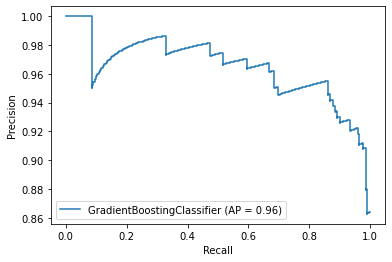

In [82]:
f=plt.figure(figsize=(15,7))

plot_precision_recall_curve(classifier, features_test, classes_test)

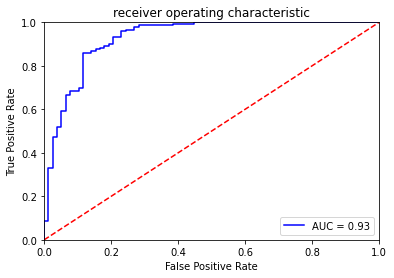

In [83]:
probs = classifier.predict_proba(features_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(classes_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('receiver operating characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'misclassified planets - true classifications')

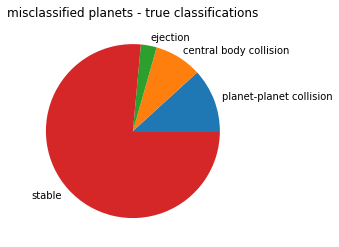

In [45]:
pp = 0
cb = 0
ej = 0
st = 0

for i in range(len(classes_test)):
    if (classes_test[i] != classes_predict[i]):
        if (fa[i] == 'planet-planet collision'):
            pp += 1
        if (fa[i] == 'ejected'):
            ej += 1
        if (fa[i] == 'central body collision'):
            cb += 1
        else:
            st += 1
            
            
nums = [pp, cb, ej, st]
labels = ['planet-planet collision', 'central body collision', 'ejection', 'stable']


plt.pie(nums, labels=labels)
plt.title('misclassified planets - true classifications')

## probabilities

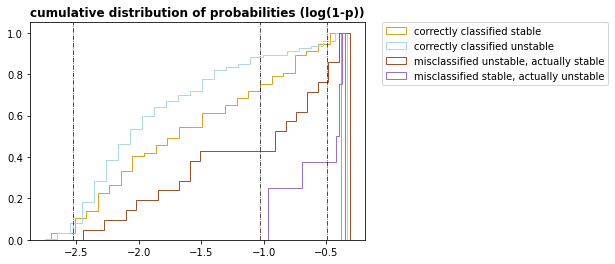

In [46]:
fig = plt.figure()
plt.title('cumulative distribution of probabilities (log(1-p))', fontweight='bold')

p = []
r = classifier.predict_proba(features_test)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            p.append(np.log(1-r[i][0]))
        else:
            p.append(np.log(1-r[i][1]))
    else:
        if (classes_test[i] == 0):
            p.append(np.log10(1-r[i][1]))
        else:
            p.append(np.log10(1-r[i][0]))
              

                
cs = []
cu = []
ts = []   # misclassified unstable, actually stable
tu = []   # misclassified stable, actually unstable


# correct
inds = []

for i in range(0,len(classes_test)):
    if (classes_test[i] == classes_predict[i]):   # 0 = stable, 1 = unstable
        inds.append(i)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            cs.append(np.log10(1-r[i][0]))
        else:
            cu.append(np.log10(1-r[i][1]))
            
            
# wrong
inds2 = []

for i in range(0,len(classes_test)):
    if (classes_test[i] != classes_predict[i]):
        inds2.append(i)

for i in range(0,len(r)):
    if (classes_test[i] != classes_predict[i]):
        if (classes_test[i] == 0):
            ts.append(np.log10(1-r[i][1]))
        else:
            tu.append(np.log10(1-r[i][0]))
                
                
                
n, bins, patches = plt.hist(cs, 25, density=True, histtype='step', cumulative=True, label='correctly classified stable', color='goldenrod')
n, bins, patches = plt.hist(cu, 25, density=True, histtype='step', cumulative=True, label='correctly classified unstable', color='lightblue')
n, bins, patches = plt.hist(ts, 25, density=True, histtype='step', cumulative=True, label='misclassified unstable, actually stable', color='sienna')
n, bins, patches = plt.hist(tu, 25, density=True, histtype='step', cumulative=True, label='misclassified stable, actually unstable', color='mediumpurple')
# n, bins, patches = plt.hist(p, 25, density=True, histtype='step', cumulative=True, label='all', color='black', linewidth=1.25)



# sigmas, log10(1-0.68) = -0.495, log10(1-0.95) = -1.031, log10(1-0.997) = -2.523
plt.axvline(x=-0.495, color='black', linestyle='-.', linewidth=0.7)
plt.axvline(x=-1.031, color='black', linestyle='-.', linewidth=0.7)
plt.axvline(x=-2.523, color='black', linestyle='-.', linewidth=0.7)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

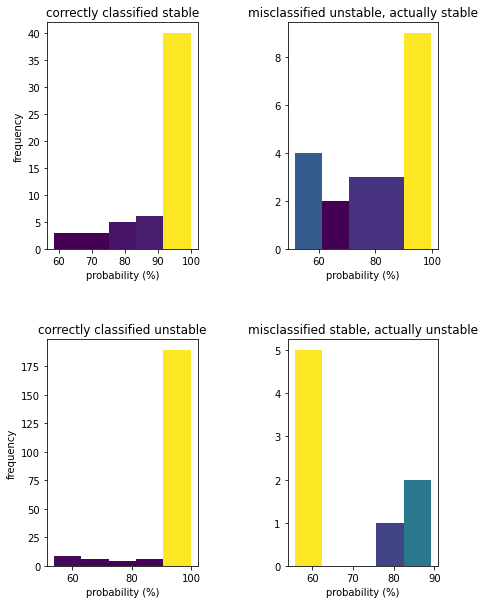

In [47]:
# histogram

%matplotlib inline

fig = plt.figure(figsize=(7, 10))
# plt.suptitle('distribution of probabilities', y=1.04, fontweight='bold')
    
    

cs = []
cu = []
ts = []   # misclassified unstable, actually stable
tu = []   # misclassified stable, actually unstable


# correct
inds = []

for i in range(0,len(classes_test)):
    if (classes_test[i] == classes_predict[i]):   # 0 = stable, 1 = unstable
        inds.append(i)

r = classifier.predict_proba(features_test)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            cs.append(r[i][0]*100)
        else:
            cu.append(r[i][1]*100)
            
            
# wrong
inds2 = []

r2 = classifier.predict_proba(features_test)

for i in range(0,len(classes_test)):
    if (classes_test[i] != classes_predict[i]):
        inds2.append(i)

for i in range(0,len(r2)):
    if (classes_test[i] != classes_predict[i]):
        if (classes_test[i] == 0):
            ts.append(r2[i][1]*100)
        else:
            tu.append(r2[i][0]*100)
            
            
plt.subplot(2, 2, 1)
N, bins, patches = plt.hist(cs, bins = 5)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('probability (%)')
plt.title('correctly classified stable')
plt.ylabel('frequency')


plt.subplot(2, 2, 2)
N, bins, patches = plt.hist(ts, bins = 5)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('probability (%)')
plt.title('misclassified unstable, actually stable')


plt.subplot(2, 2, 3)
N, bins, patches = plt.hist(cu, bins = 5)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('probability (%)')
plt.title('correctly classified unstable')
plt.ylabel('frequency')


plt.subplot(2, 2, 4)
N, bins, patches = plt.hist(tu, bins = 5)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('probability (%)')
plt.title('misclassified stable, actually unstable')


plt.subplots_adjust(wspace=0.6, hspace = 0.4)
plt.show()

## corner plot

In [33]:
mratio_mm1 = []
mratio_mm2 = []
sde = []
sdi = []
cvperi = []



m1ratio_sc = []       # stable correct
m2ratio_sc = []
sde_sc = []
cvperi_sc = []
sdi_sc = []
 
m1ratio_uc = []       # unstable correct
m2ratio_uc = []
sde_uc = []
cvperi_uc = []
sdi_uc = []

m1ratio_ts = []       # misclassified unstable, true stable
m2ratio_ts = []
sde_ts = []
cvperi_ts = []
sdi_ts = []

m1ratio_tu = []       # misclassified stable, true unstable
m2ratio_tu = []
sde_tu = []
cvperi_tu = []
sdi_tu = []



ind = []


for c in range(len(features_test)):
    if (np.isnan(np.log10(features_test[c].any()))):
        pass
    
    if (np.log10(features_test[c].all()) != math.inf):
        if ((np.log10(features_test[c].all()) != -math.inf)):
            ind.append(c)

            
# sd e = [4]
# sd i = [5]
# cv peri = [0]
# log mass 1 ratio = [12]
# log mass 2 ratio = [13]



for i in range(len(ind)):
    m1ratio.append(features_test[ind[i]][12])
    m2ratio.append(features_test[ind[i]][13])
    sde.append(np.log10(features_test[ind[i]][4]))
    cvperi.append(np.log10(features_test[ind[i]][0]))
    sdi.append(np.log10(features_test[ind[i]][5]))
        
    if (classes_test[ind[i]] == classes_predict[ind[i]]):
        if (classes_test[ind[i]] == 0):
            m1ratio_sc.append(features_test[ind[i]][12])
            m2ratio_sc.append(features_test[ind[i]][13])
            sde_sc.append(np.log10(features_test[ind[i]][4]))
            cvperi_sc.append(np.log10(features_test[ind[i]][0]))
            sdi_sc.append(np.log10(features_test[ind[i]][5]))
        elif (classes_test[ind[i]] == 1):
            m1ratio_uc.append(features_test[ind[i]][12])
            m2ratio_uc.append(features_test[ind[i]][13])
            sde_uc.append(np.log10(features_test[ind[i]][4]))
            cvperi_uc.append(np.log10(features_test[ind[i]][0]))
            sdi_uc.append(np.log10(features_test[ind[i]][5]))
    else:
        if (classes_test[ind[i]] == 0 and classes_predict[ind[i]] == 1):
            m1ratio_ts.append(features_test[ind[i]][12])
            m2ratio_ts.append(features_test[ind[i]][13])
            sde_ts.append(np.log10(features_test[ind[i]][4]))
            cvperi_ts.append(np.log10(features_test[ind[i]][0]))
            sdi_ts.append(np.log10(features_test[ind[i]][5]))
        elif (classes_test[ind[i]] == 1 and classes_predict[ind[i]] == 0):
            m1ratio_tu.append(features_test[ind[i]][12])
            m2ratio_tu.append(features_test[ind[i]][13])
            sde_tu.append(np.log10(features_test[ind[i]][4]))
            cvperi_tu.append(np.log10(features_test[ind[i]][0]))
            sdi_tu.append(np.log10(features_test[ind[i]][5]))   

<ipython-input-33-ec6ebd38f267>:41: RuntimeWarning: divide by zero encountered in log10
  if (np.log10(features_test[c].all()) != math.inf):
<ipython-input-33-ec6ebd38f267>:42: RuntimeWarning: divide by zero encountered in log10
  if ((np.log10(features_test[c].all()) != -math.inf)):


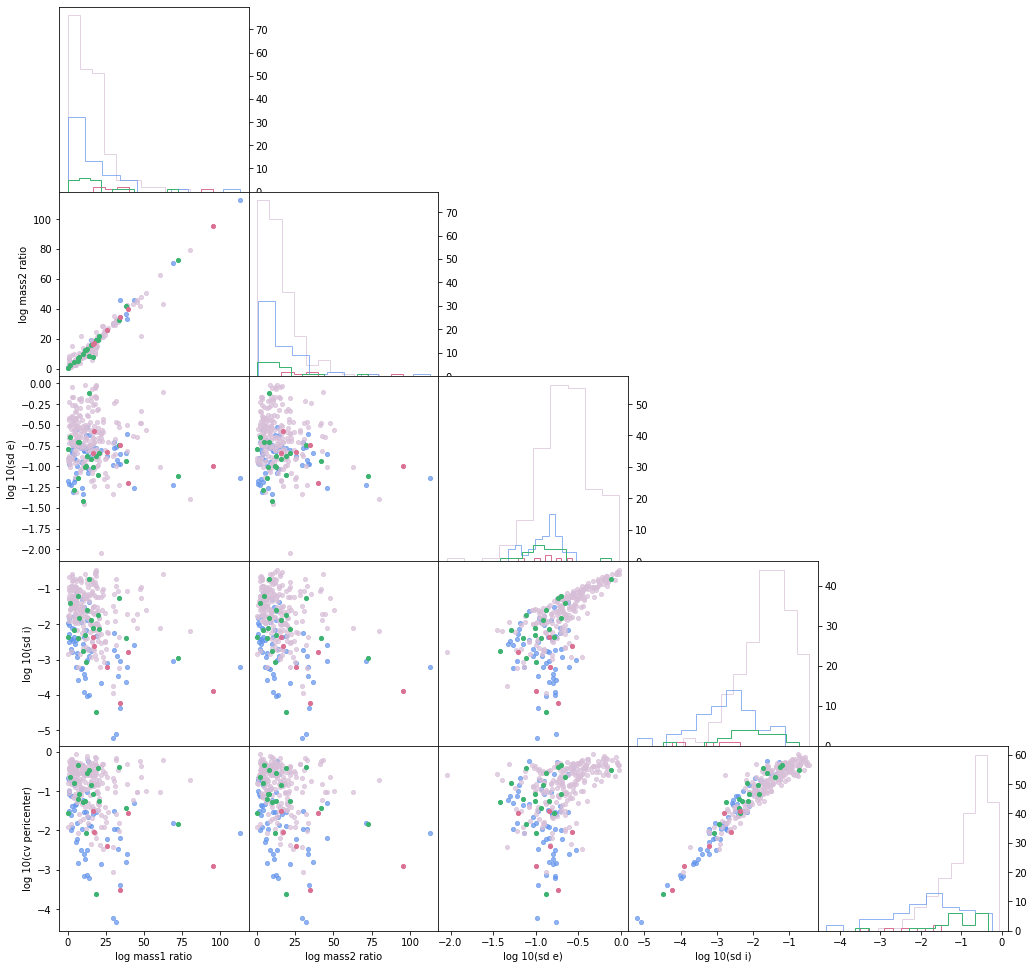

In [34]:
%matplotlib inline

fig, axs = plt.subplots(5,5, figsize=(17,17))#, sharex="col") # sharey = 'row')

var = [m1ratio, m2ratio, sde, sdi, cvperi]
varsc = [m1ratio_sc, m2ratio_sc, sde_sc, sdi_sc, cvperi_sc]
varuc = [m1ratio_uc, m2ratio_uc, sde_uc, sdi_uc, cvperi_uc]
varts = [m1ratio_ts, m2ratio_ts, sde_ts, sdi_ts, cvperi_ts]
vartu = [m1ratio_tu, m2ratio_tu, sde_tu, sdi_tu, cvperi_tu]

ns = ['log mass1 ratio', 'log mass2 ratio', 'log 10(sd e)', 'log 10(sd i)', 'log 10(cv pericenter)']


for x in range(0,5):
    for y in range(0,5):
        
        if (y > x):
            axs[x,y].set_visible(False)
        
        elif (y == x):           
    
            axs[x,y].yaxis.tick_right()            
        
            axs[x,y].hist(varuc[x], histtype='step', color='thistle', alpha=0.7)
            axs[x,y].hist(vartu[x], histtype='step', color='palevioletred')
            axs[x,y].hist(varsc[x], histtype='step', color='cornflowerblue', alpha=0.7)
            axs[x,y].hist(varts[x], histtype='step', color='mediumseagreen')
        
        else:
            axs[x,y].scatter(varsc[y], varsc[x], 17, color = 'cornflowerblue', label = "correcly classified stable", alpha=0.7) 
            axs[x,y].scatter(varts[y], varts[x], 17, color = 'mediumseagreen', label = "misclassified unstable, actually stable", zorder = 2) 
            axs[x,y].scatter(varuc[y], varuc[x], 17, color = 'thistle', label = "correctly classified unstable", alpha=0.7)
            axs[x,y].scatter(vartu[y], vartu[x], 17, color = 'palevioletred', label = "misclassified stable, actually unstable", zorder = 2)
            
            if (y == 0):
                axs[x,y].set_ylabel(str(ns[x]))
            else:
                axs[x,y].set_yticks([])
            
            if (x == 4):
                axs[x,y].set_xlabel(str(ns[y]))
            else:
                axs[x,y].set_xticks([])


                  
plt.subplots_adjust(wspace=0, hspace=0)

## mass

In [7]:
data = dict()

for rn in range(1,101):
    data[rn] = dict()
    
    for planetnum in range(1,11):
        data[rn][planetnum] = dict()
        pl = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=2, max_rows=1)
        
        data[rn][planetnum]['mass'] = pl[1]

In [22]:
pred = cross_val_predict(classifier, features_train, classes_train, cv=10)

fate = []

for i in range(len(fa)):
    if (fa[i] == 'remaining'):
        fate.append(0)
    else:
        fate.append(1)
        
        
        
test_tup = [(ru[i], p[i]) for i in range (len(ru))]
all_dict = {}
for i in range(len(ru)):
    tt = test_tup[i]
    all_dict[tt] = {}
    all_dict[tt]['outcome'] = classes_test[i]
    all_dict[tt]['predict'] = classes_predict[i]
    all_dict[tt]['end time'] = et[i]
    all_dict[tt]['type'] = 'test'
    
    
test_tup = [(ru2[i], p2[i]) for i in range (len(ru2))]    
for i in range(len(ru2)):
    tt = test_tup[i]
    all_dict[tt] = {}
    all_dict[tt]['outcome'] = classes_train[i]
    all_dict[tt]['predict'] = pred[i]
    all_dict[tt]['end time'] = et2[i]
    all_dict[tt]['type'] = 'train'

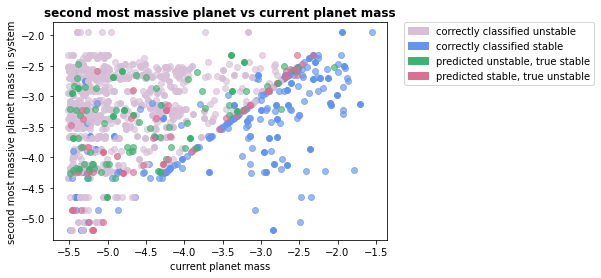

In [9]:
fig = plt.figure()
plt.title('second most massive planet vs current planet mass', fontweight='bold')


for rn in range(1,101):
    ms = []
    
    for p in range(1,11):
        ms.append(data[rn][p]['mass'])
    
    m1 = np.max(ms) 
    ms.remove(m1)
    m2 = np.max(ms)
    
    for p in range(1,11):
        col = 'white'
        zord = 1
        alp = 1

        if (all_dict[rn, p]['outcome'] == all_dict[rn, p]['predict']):
            if (all_dict[rn, p]['outcome'] == 1): # unstable
                col = 'thistle'
            else:
                col = 'cornflowerblue'
        else:
            zord = 3
            if (all_dict[rn, p]['outcome'] == 1): # true unstable, predicted stable
                col = 'palevioletred'
            else:
                col = 'mediumseagreen'
                    
        if (all_dict[rn, p]['type'] == 'train'):
            alp = 0.65
                
        plt.scatter(np.log10(data[rn][p]['mass']), np.log10(m2), color = col, zorder = zord, alpha = alp)
          
        
plt.xlabel('current planet mass')
plt.ylabel('second most massive planet mass in system')

patch = mpatches.Patch(color='mediumseagreen', label='predicted unstable, true stable')
patch2 = mpatches.Patch(color='cornflowerblue', label='correctly classified stable')
patch3 = mpatches.Patch(color='palevioletred', label='predicted stable, true unstable')
patch4 = mpatches.Patch(color='thistle', label='correctly classified unstable')

plt.legend(handles=[patch4, patch2, patch, patch3], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  

# plt.ylim(-5.5, -1)

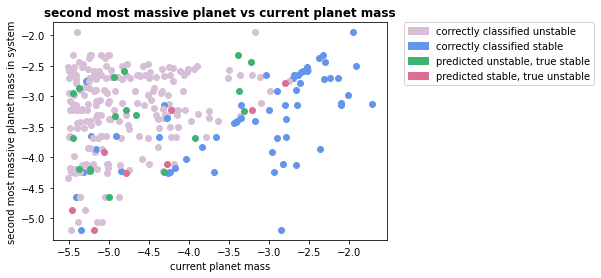

In [10]:
fig = plt.figure()
plt.title('second most massive planet vs current planet mass', fontweight='bold')


for rn in range(1,101):
    ms = []
    
    for p in range(1,11):
        ms.append(data[rn][p]['mass'])
    
    m1 = np.max(ms) 
    ms.remove(m1)
    m2 = np.max(ms)
    
    for p in range(1,11):
        col = 'white'
        zord = 1
        alp = 1

        if (all_dict[rn, p]['type'] == 'train'):
            pass
        
        else:
            if (all_dict[rn, p]['outcome'] == all_dict[rn, p]['predict']):
                if (all_dict[rn, p]['outcome'] == 1): # unstable
                    col = 'thistle'
                else:
                    col = 'cornflowerblue'
            else:
                zord = 3
                if (all_dict[rn, p]['outcome'] == 1): # true unstable, predicted stable
                    col = 'palevioletred'
                else:
                    col = 'mediumseagreen'

            plt.scatter(np.log10(data[rn][p]['mass']), np.log10(m2), color = col, zorder = zord, alpha = alp)
          
        
plt.xlabel('current planet mass')
plt.ylabel('second most massive planet mass in system')

patch = mpatches.Patch(color='mediumseagreen', label='predicted unstable, true stable')
patch2 = mpatches.Patch(color='cornflowerblue', label='correctly classified stable')
patch3 = mpatches.Patch(color='palevioletred', label='predicted stable, true unstable')
patch4 = mpatches.Patch(color='thistle', label='correctly classified unstable')

plt.legend(handles=[patch4, patch2, patch, patch3], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  

# plt.ylim(-5.5, -1)

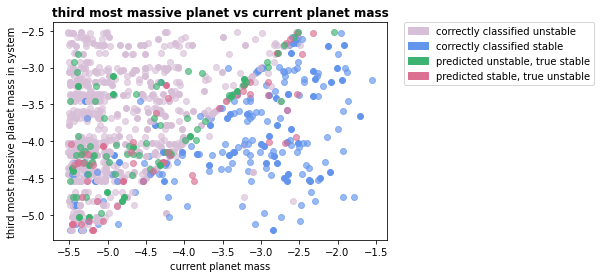

In [11]:
fig = plt.figure()
plt.title('third most massive planet vs current planet mass', fontweight='bold')


for rn in range(1,101):
    ms = []
    
    for p in range(1,11):
        ms.append(data[rn][p]['mass'])
    
    m1 = np.max(ms) 
    ms.remove(m1)
    m2 = np.max(ms)
    ms.remove(m2)
    m3 = np.max(ms)
    
    for p in range(1,11):
        col = 'white'
        zord = 1
        alp = 1

        if (all_dict[rn, p]['outcome'] == all_dict[rn, p]['predict']):
            if (all_dict[rn, p]['outcome'] == 1): # unstable
                col = 'thistle'
            else:
                col = 'cornflowerblue'
        else:
            zord = 3
            if (all_dict[rn, p]['outcome'] == 1): # true unstable, predicted stable
                col = 'palevioletred'
            else:
                col = 'mediumseagreen'
                    
        if (all_dict[rn, p]['type'] == 'train'):
            alp = 0.65
                
        plt.scatter(np.log10(data[rn][p]['mass']), np.log10(m3), color = col, zorder = zord, alpha = alp)
          
        
plt.xlabel('current planet mass')
plt.ylabel('third most massive planet mass in system')

patch = mpatches.Patch(color='mediumseagreen', label='predicted unstable, true stable')
patch2 = mpatches.Patch(color='cornflowerblue', label='correctly classified stable')
patch3 = mpatches.Patch(color='palevioletred', label='predicted stable, true unstable')
patch4 = mpatches.Patch(color='thistle', label='correctly classified unstable')

plt.legend(handles=[patch4, patch2, patch, patch3], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  

# plt.ylim(-5.5, -1)

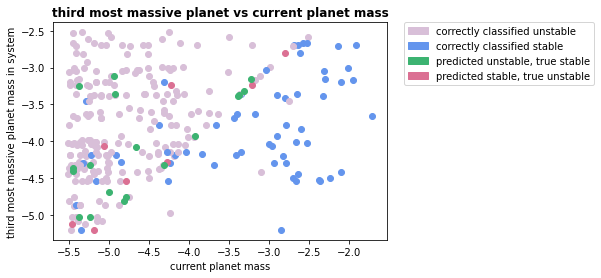

In [12]:
fig = plt.figure()
plt.title('third most massive planet vs current planet mass', fontweight='bold')


for rn in range(1,101):
    ms = []
    
    for p in range(1,11):
        ms.append(data[rn][p]['mass'])
    
    m1 = np.max(ms) 
    ms.remove(m1)
    m2 = np.max(ms)
    ms.remove(m2)
    m3 = np.max(ms)
    
    for p in range(1,11):
        col = 'white'
        zord = 1
        alp = 1

        if (all_dict[rn, p]['type'] == 'train'):
            pass
        
        else:
            if (all_dict[rn, p]['outcome'] == all_dict[rn, p]['predict']):
                if (all_dict[rn, p]['outcome'] == 1): # unstable
                    col = 'thistle'
                else:
                    col = 'cornflowerblue'
            else:
                zord = 3
                if (all_dict[rn, p]['outcome'] == 1): # true unstable, predicted stable
                    col = 'palevioletred'
                else:
                    col = 'mediumseagreen'
                    
            plt.scatter(np.log10(data[rn][p]['mass']), np.log10(m3), color = col, zorder = zord, alpha = alp)
          
        
plt.xlabel('current planet mass')
plt.ylabel('third most massive planet mass in system')

patch = mpatches.Patch(color='mediumseagreen', label='predicted unstable, true stable')
patch2 = mpatches.Patch(color='cornflowerblue', label='correctly classified stable')
patch3 = mpatches.Patch(color='palevioletred', label='predicted stable, true unstable')
patch4 = mpatches.Patch(color='thistle', label='correctly classified unstable')

plt.legend(handles=[patch4, patch2, patch, patch3], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  

# plt.ylim(-5.5, -1)

## misclassifications

#### misclassified unstable, true stable

Text(0.5, 1.0, 'Misclassifed unstable, true stable \nplanets by system location')

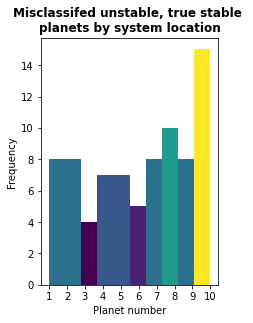

In [97]:
plnumberg = []

for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 0) and (all_dict[rn, p]['predict'] == 1):
            plnumberg.append(p)
            

            
fig = plt.figure(figsize=(7, 10))            
            
plt.subplot(2, 2, 1)
N, bins, patches = plt.hist(plnumberg, bins = 10)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Planet number')
plt.xticks(range(1, 11))
plt.ylabel('Frequency')
plt.title('Misclassifed unstable, true stable \nplanets by system location', loc='center', fontweight='bold')

Text(0, 0.5, 'final system multiplicity')

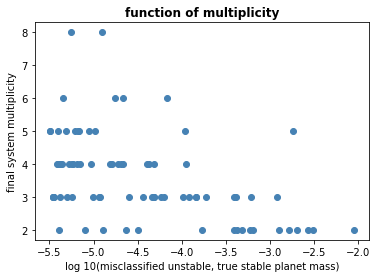

In [30]:
fig = plt.figure()
plt.title('function of multiplicity', fontweight='bold')


for rn in range(1,101):
    for p in range(1,11):
        multcount = 0
        if (all_dict[rn, p]['outcome'] == 0) and (all_dict[rn, p]['predict'] == 1):
            for p2 in range(1,11):
                if (all_dict[rn, p2]['outcome'] == 0):
                    multcount += 1
            plt.scatter(np.log10(data[rn][p]['mass']), multcount, color = 'steelblue')
            
            
plt.xlabel('log 10(misclassified unstable, true stable planet mass)')
plt.ylabel('final system multiplicity')

Text(0, 0.5, 'log 10(most massive planet in system)')

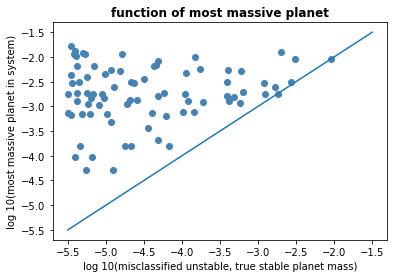

In [79]:
fig = plt.figure()
plt.title('function of most massive planet', fontweight='bold')


for rn in range(1,101):
    for p in range(1,11):
        allms = []
        if (all_dict[rn, p]['outcome'] == 0) and (all_dict[rn, p]['predict'] == 1):
            for p2 in range(1,11):
                allms.append(data[rn][p2]['mass'])
            
            mm1 = np.max(allms)
            
            plt.scatter(np.log10(data[rn][p]['mass']), np.log10(mm1), color = 'steelblue')
            if (data[rn][p]['mass'] > mm1):
                print(rn, p, data[rn][p]['mass'], mm1)
            

plt.plot([-5.5, -1.5], [-5.5, -1.5])
plt.xlabel('log 10(misclassified unstable, true stable planet mass)')
plt.ylabel('log 10(most massive planet in system)')

In [13]:
redms = []
stms = []
unstms = []

for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 0) and (all_dict[rn, p]['predict'] == 1):
            redms.append(data[rn][p]['mass'])
            
        if (all_dict[rn, p]['outcome'] == 0):
            stms.append(data[rn][p]['mass'])
            
        if (all_dict[rn, p]['outcome'] == 1):
            unstms.append(data[rn][p]['mass'])
            

print('misclassified unstable, true stable planets')
print('average: ', np.average(redms))
print('median: ', np.median(redms))
print('\n correctly classified stable')
print('average: ', np.average(stms))
print('median: ', np.median(stms))
print('\n correctly classified unstable')
print('average: ', np.average(unstms))
print('median: ', np.median(unstms))

misclassified unstable, true stable planets
average:  0.00035767160986249996
median:  1.990472e-05

 correctly classified stable
average:  0.0017803388073531468
median:  0.0004202449

 correctly classified unstable
average:  0.0001429654607787115
median:  8.633389000000001e-06


In [95]:
gcount = 0
innermm = 0
outermm = 0
twomm = 0
nomm = 0

for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 0) and (all_dict[rn, p]['predict'] == 1): #and (all_dict[rn, p]['type'] == 'test'):
            gcount += 1
            cm = data[rn][p]['mass']
            
            if (p == 1):
                mi = data[rn][2]['mass']; mo = data[rn][3]['mass']
            elif (p == 10):
                mi = data[rn][9]['mass']; mo = data[rn][8]['mass']
            else:
                mi = data[rn][p-1]['mass']; mo = data[rn][p+1]['mass']
                
            if (mi > cm) and (mo > cm):
                twomm += 1     
            elif (mi > cm):
                innermm += 1
            elif (mo > cm):
                outermm += 1
            else:
                nomm += 1
            
                
print('number of planets misclassified unstable, true stable: ', gcount)
print('planets with two more massive neighboring planets: ', twomm)
print('planets with one more massive neighboring planet: ', innermm + outermm)
print('\tmore massive inner neighboring planet: ', innermm)
print('\tmore massive outer neighboring planet: ', outermm)
print('planets more massive than both neighboring planets: ', nomm)

number of planets misclassified unstable, true stable:  80
planets with two more massive neighboring planets:  24
planets with one more massive neighboring planet:  31
	more massive inner neighboring planet:  17
	more massive outer neighboring planet:  14
planets more massive than both neighboring planets:  25


In [96]:
gcount = 0
boths = 0
outers = 0
inners = 0
nos = 0

for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 0) and (all_dict[rn, p]['predict'] == 1): #and (all_dict[rn, p]['type'] == 'test'):
            gcount += 1
            
            if (p == 1):
                mi = 2; mo = 3
            elif (p == 10):
                mi = 9; mo = 8
            else:
                mi = p-1; mo = p+1
                
            if (all_dict[rn, mi]['outcome'] == 0) and (all_dict[rn, mo]['outcome'] == 0):
                boths += 1
            elif (all_dict[rn, mi]['outcome'] == 0):
                inners += 1
            elif (all_dict[rn, mo]['outcome'] == 0):
                outers += 1
            else:
                nos += 1
                
                
print('number of planets misclassified unstable, true stable: ', gcount)
print('planets with two stable neighboring planets: ', boths)
print('planets with stable inner neighboring planet: ', inners)
print('planets with stable outer neighboring planet: ', outers)
print('planets more no stable neighboring planets: ', nos)

number of planets misclassified unstable, true stable:  80
planets with two stable neighboring planets:  6
planets with stable inner neighboring planet:  18
planets with stable outer neighboring planet:  17
planets more no stable neighboring planets:  39


#### misclassified stable, true unstable

Text(0.5, 1.0, 'Misclassifed stable, true unstable \nplanets by system location')

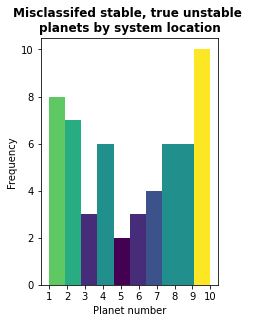

In [122]:
plnumberg = []

for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 1) and (all_dict[rn, p]['predict'] == 0):
            plnumberg.append(p)
            

            
fig = plt.figure(figsize=(7, 10))            
            
plt.subplot(2, 2, 1)
N, bins, patches = plt.hist(plnumberg, bins = 10)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Planet number')
plt.xticks(range(1, 11))
plt.ylabel('Frequency')
plt.title('Misclassifed stable, true unstable \nplanets by system location', loc='center', fontweight='bold')

Text(0, 0.5, 'final system multiplicity')

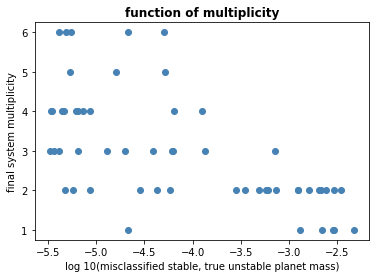

In [31]:
fig = plt.figure()
plt.title('function of multiplicity', fontweight='bold')


for rn in range(1,101):
    for p in range(1,11):
        multcount = 0
        if (all_dict[rn, p]['outcome'] == 1) and (all_dict[rn, p]['predict'] == 0):
            for p2 in range(1,11):
                if (all_dict[rn, p2]['outcome'] == 0):
                    multcount += 1
            plt.scatter(np.log10(data[rn][p]['mass']), multcount, color = 'steelblue')
            
            
plt.xlabel('log 10(misclassified stable, true unstable planet mass)')
plt.ylabel('final system multiplicity')

Text(0, 0.5, 'log 10(end time)')

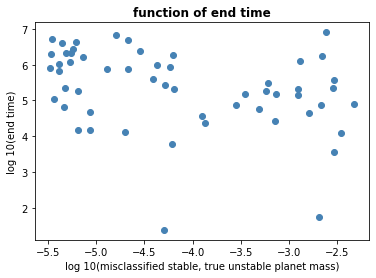

In [32]:
fig = plt.figure()
plt.title('function of end time', fontweight='bold')


for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 1) and (all_dict[rn, p]['predict'] == 0):
            plt.scatter(np.log10(data[rn][p]['mass']), np.log10(all_dict[rn, p]['end time']), color = 'steelblue')
            
            
plt.xlabel('log 10(misclassified stable, true unstable planet mass)')
plt.ylabel('log 10(end time)')

Text(0, 0.5, 'log 10(most massive planet in system)')

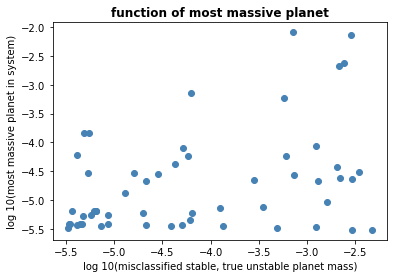

In [34]:
fig = plt.figure()
plt.title('function of most massive planet', fontweight='bold')


for rn in range(1,101):
    for p in range(1,11):
        allms = []
        if (all_dict[rn, p]['outcome'] == 1) and (all_dict[rn, p]['predict'] == 0):
            for p2 in range(1,11):
                allms.append(data[rn][p2]['mass'])
            
            mm1 = np.max(data[rn][p2]['mass'])
            
            plt.scatter(np.log10(data[rn][p]['mass']), np.log10(mm1), color = 'steelblue')
            
            
plt.xlabel('log 10(misclassified stable, true unstable planet mass)')
plt.ylabel('log 10(most massive planet in system)')

In [76]:
mstu = dict()

for rn in range(1,101):
    mstu[rn] = dict()
    
    for planetnum in range(1,11):
        mstu[rn][planetnum] = dict()
            
        pl = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=2, max_rows=1)
        le = len(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el')
        pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
        
        mstu[rn][planetnum]['initial e'] = pl[3]
        mstu[rn][planetnum]['initial a'] = pl[2]
           
        try:
#             print(pl2[2])
            mstu[rn][planetnum]['final e'] = pl2[1][3]
            mstu[rn][planetnum]['final a'] = pl2[1][2]
        except:
            print(len(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el'))
#             pass

<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run11/PL4.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run12/PL1.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run13/PL9.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/l

68
68
68
68


<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run24/PL4.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run28/PL1.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run28/PL6.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/l

68
68
68
68
68


<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run36/PL4.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run41/PL2.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run41/PL3.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/l

68
68
68
68
68


<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run51/PL4.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run53/PL3.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)


68
68


<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run68/PL5.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run71/PL3.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run72/PL5.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)


68
68
68


<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run75/PL2.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run75/PL3.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run75/PL4.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/l

68
68
68
68
68
68


<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run87/PL7.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run88/PL7.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run89/PL1.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/l

68
68
68
68
68
68
68
69
68


<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run93/PL8.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run94/PL2.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/lanl/classifier/s. mordasini data/run97/PL7.el"
  pl2 = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=(le-1), max_rows=2)
<ipython-input-76-1a67f6768a58>:11: UserWarning: genfromtxt: Empty input file: "/Users/neha/Documents/l

In [54]:
ca = []
ce = []
wa = []
we = []

for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 1) and (all_dict[rn, p]['predict'] == 0):
            wa.append((mstu[rn][planetnum]['final a'] - mstu[rn][planetnum]['initial a'])/mstu[rn][planetnum]['initial a'])
            we.append((mstu[rn][planetnum]['final e'] - mstu[rn][planetnum]['initial e'])/mstu[rn][planetnum]['initial e'])
            
        elif (all_dict[rn, p]['outcome'] == 1) and (all_dict[rn, p]['predict'] == 1):
            ca.append((mstu[rn][planetnum]['final a'] - mstu[rn][planetnum]['initial a'])/mstu[rn][planetnum]['initial a'])
            ce.append((mstu[rn][planetnum]['final e'] - mstu[rn][planetnum]['initial e'])/mstu[rn][planetnum]['initial e'])

KeyError: 'final a'

In [120]:
gcount = 0
innermm = 0
outermm = 0
twomm = 0
nomm = 0

for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 1) and (all_dict[rn, p]['predict'] == 0): #and (all_dict[rn, p]['type'] == 'test'):
            gcount += 1
            cm = data[rn][p]['mass']
            
            if (p == 1):
                mi = data[rn][2]['mass']; mo = data[rn][3]['mass']
            elif (p == 10):
                mi = data[rn][9]['mass']; mo = data[rn][8]['mass']
            else:
                mi = data[rn][p-1]['mass']; mo = data[rn][p+1]['mass']
                
            if (mi > cm) and (mo > cm):
                twomm += 1     
            elif (mi > cm):
                innermm += 1
            elif (mo > cm):
                outermm += 1
            else:
                nomm += 1
            
                
print('number of planets misclassified stable, true unstable: ', gcount)
print('planets with two more massive neighboring planets: ', twomm)
print('planets with one more massive neighboring planet: ', innermm + outermm)
print('\tmore massive inner neighboring planet: ', innermm)
print('\tmore massive outer neighboring planet: ', outermm)
print('planets more massive than both neighboring planets: ', nomm)

number of planets misclassified stable, true unstable:  55
planets with two more massive neighboring planets:  12
planets with one more massive neighboring planet:  18
	more massive inner neighboring planet:  9
	more massive outer neighboring planet:  9
planets more massive than both neighboring planets:  25


In [121]:
gcount = 0
boths = 0
outers = 0
inners = 0
nos = 0

for rn in range(1,101):
    for p in range(1,11):
        if (all_dict[rn, p]['outcome'] == 1) and (all_dict[rn, p]['predict'] == 0): #and (all_dict[rn, p]['type'] == 'test'):
            gcount += 1
            
            if (p == 1):
                mi = 2; mo = 3
            elif (p == 10):
                mi = 9; mo = 8
            else:
                mi = p-1; mo = p+1
                
            if (all_dict[rn, mi]['outcome'] == 0) and (all_dict[rn, mo]['outcome'] == 0):
                boths += 1
            elif (all_dict[rn, mi]['outcome'] == 0):
                inners += 1
            elif (all_dict[rn, mo]['outcome'] == 0):
                outers += 1
            else:
                nos += 1
                
                
print('number of planets misclassified stable, true unstable: ', gcount)
print('planets with two stable neighboring planets: ', boths)
print('planets with stable inner neighboring planet: ', inners)
print('planets with stable outer neighboring planet: ', outers)
print('planets more no stable neighboring planets: ', nos)

number of planets misclassified stable, true unstable:  55
planets with two stable neighboring planets:  5
planets with stable inner neighboring planet:  12
planets with stable outer neighboring planet:  12
planets more no stable neighboring planets:  26


## planet number distributions

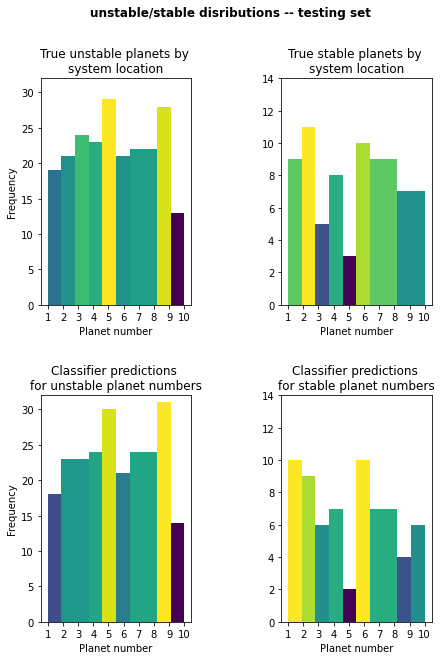

In [100]:
fig = plt.figure(figsize=(7, 10))

r = classifier.predict_proba(features_test) 
s = []
u = []

st = []
ut = []


for i in range(0,len(r)):
    if (classes_predict[i] == 1):
        u.append(p[i])
    if (classes_predict[i] == 0):
        s.append(p[i])

        
for i in range(0,len(r)):
    if (classes_test[i] == 1):
        ut.append(p[i])
    if (classes_test[i] == 0):
        st.append(p[i])        
    

plt.subplot(2, 2, 1)
N, bins, patches = plt.hist(ut, bins = 10)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Planet number')
plt.xticks(range(1, 11))
plt.ylabel('Frequency')
plt.title('True unstable planets by \nsystem location', loc='center')
plt.ylim(0,32)


plt.subplot(2, 2, 2)
N, bins, patches = plt.hist(st, bins = 10)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Planet number') 
plt.xticks(range(1, 11))
plt.title('True stable planets by \nsystem location', loc='center')
plt.ylim(0,14)


plt.subplot(2, 2, 3)
N, bins, patches = plt.hist(u, bins = 10)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Planet number')
plt.xticks(range(1, 11))
plt.ylabel('Frequency')
plt.title('Classifier predictions \nfor unstable planet numbers', loc='center')
plt.ylim(0,32)


plt.subplot(2, 2, 4)
N, bins, patches = plt.hist(s, bins = 10)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Planet number') 
plt.xticks(range(1, 11))
plt.title('Classifier predictions \nfor stable planet numbers', loc='center')
plt.ylim(0,14)


plt.suptitle('unstable/stable disributions -- testing set', fontweight='bold')
plt.subplots_adjust(wspace=0.6, hspace = 0.4)
plt.show()

## changing stability limits

In [102]:
data = dict()

for rn in range(1,101):
    data[rn] = dict()
    for planetnum in range(1,11):
        data[rn][planetnum] = dict()
        pl = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=2, max_rows=365498)
        
        data[rn][planetnum]['Time'] = []
        
        for time in range(len(pl)):
            try:
                data[rn][planetnum]['Time'].append(pl[time][0])
            except:
                data[rn][planetnum]['Time'].append(pl[0])

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().d

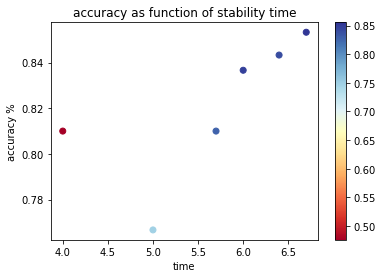

In [116]:
planets = pd.read_csv('2-3 mm.csv', skipinitialspace=True)

# 10000 = 731, 100000 = 7305, 500000 = 36550, 1M = 73100, 5M = 365498

times = [10000, 100000, 500000, 1000000, 2500000, 5000000]
acc = []
cbTe = []


d = ['run', 'planet', 'fate', 'end time', 'initial pericenter',
       'final pericenter', 'mean pericenter', 'min pericenter',
       'max pericenter', 'sd pericenter', 'initial jacobi', 'final jacobi',
       'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi', 'final log mass1_ratio',
       'mean log mass1_ratio', 'min log mass1_ratio', 'max log mass1_ratio',
       'sd log mass1_ratio', 'final log mass2_ratio', 
       'mean log mass2_ratio', 'min log mass2_ratio',
       'max log mass2_ratio', 'sd log mass2_ratio']


e = ['e']
mhr1 = ['mhr1']
mhr2 = ['mhr2']
a2 = ['log a2_ratio']

a1 = ['log a1_ratio']
o = ['i', 'a']

for v in mhr1:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
#     d.append('max ' + str(v))
#     d.append('sd ' + str(v))

for v in mhr2:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
    d.append('max ' + str(v))
#     d.append('sd ' + str(v))

for v in e:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
#     d.append('min ' + str(v))
#     d.append('max ' + str(v))
#     d.append('sd ' + str(v))
    d.append('cv ' + str(v))
    
for v in a2:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
    d.append('max ' + str(v))
    d.append('sd ' + str(v))

for v in a1:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
#     d.append('mean ' + str(v))
#     d.append('min ' + str(v))
    d.append('max ' + str(v))
#     d.append('sd ' + str(v))

for v in o:
    if v == 'i':
        d.append('initial ' + str(v))
        d.append('final ' + str(v))
        d.append('mean ' + str(v))
        d.append('min ' + str(v))
        d.append('max ' + str(v))
#         d.append('sd ' + str(v))
#         d.append('cv ' + str(v))
    else:
        d.append('cv ' + str(v))



for tind in range(0,6):
    classesC = []
    
    for r in range(1,101):
        for p in range(1,11):
            csys = (r,p)
#             if (csys in incs):
#                 pass
            if (data[r][p]['Time'][len(data[r][p]['Time']) - 1] >= times[tind]):
                classesC += [0]
            else:
                classesC += [1]
        
    classesC = np.array(classesC)
    
    
    featuresC_train, featuresC_test, classesC_train, classesC_test = train_test_split(planets, classesC, test_size=0.3, random_state=7)
    faC = featuresC_train['fate'].to_numpy()

    ids_train = featuresC_train['planet'].to_numpy()
    featuresC_train.drop(d, axis=1, inplace=True)

    cols = featuresC_train.columns
    featuresC_train = featuresC_train.to_numpy()

    ids_test = featuresC_test['planet'].to_numpy()
    featuresC_test.drop(d, axis=1, inplace=True)
    featuresC_test = featuresC_test.to_numpy()


    classifierC = GradientBoostingClassifier(learning_rate = 0.07, max_depth = 5, max_features = 'sqrt', n_estimators = 150, random_state = 183) # ne = 120-160ish
    classifierC.fit(featuresC_train, classesC_train)

    classesC_predict = classifierC.predict(featuresC_test)
    acc.append(accuracy_score(classesC_test, classesC_predict))
    
    
    countC = 0
    cC = 0
    fateC = []
    
    predC = cross_val_predict(classifierC, featuresC_train, classesC_train, cv=10)

    for i in range(len(faC)):
        if (faC[i] == 'remaining'):
            fateC.append(0)
        else:
            fateC.append(1)

            
    for i in range(len(predC)):
        countC += 1
        if (predC[i] == fateC[i]):
            cC += 1
        
    cbTe.append(cC/countC)
    
#     print(times[tind], ' years: accuracy ', accuracy_score(classesC_test, classesC_predict))
    

plt.title('accuracy as function of stability time')
plt.ylabel('accuracy %')
plt.xlabel('time')

cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(np.log10(times), acc, c=cbTe, cmap=cm)
plt.colorbar(sc)
plt.show()